# **Лялин. Домашнее задание 3. Линейная классификация. Работа с признаками**

### **Оценивание и штрафы**

Кака всегда - каждая из задач имеет «стоимость» (указана в скобках около задачи).

В задании три части:

- Часть 1 (2.5 балла): написание логистической регрессии своими руками
- Часть 2 (5 баллов): различные методы отбора признаков
- Часть 3 (3.5 балла): обучение моделей классификации на текстах

Всего за задание можно получить 11 баллов, но:

**Балл за задание = min{ваш балл, 10}.**

In [1]:
%pylab inline
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


# **Часть 1. Логистическая регрессия своими руками (2.5 балла)**

## **Задание 1. Реализуйте класс логистической регрессии, обучаемой с помощью:**

**Задание 1.1 (1 балл). Градиентного спуска**

**Задание 1.2 (1 балл). Стохастического градиентного спуска**

До этого вы писали код без ограничений. Здесь же необходимо соблюдать следующие условия:

- Градиентный спуск необходимо записать в векторном виде;
- Циклы средствами python допускается использовать только для итераций градиентного спуска;

**Класс градиентного спуска должен:**
- В качестве критерия останова использовать (одновременно):
  - проверку на евклидову норму разности весов на двух соседних итерациях задаваемого параметром `tolerance`;
  - достижение максимального числа итераций, задаваемого параметром `max_iter`.
- Обладать атрибутом `loss_history`. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту). Данный атрибут необходим, чтобы проследить, что оптимизационный процесс действительно сходится;
- Инициализировать веса случайным образом или нулевым вектором (на ваш выбор).

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

**Шаблон класса описан ниже, вам нужно реализовать каждую из заготовленных функций.**

**ВАЖНО!** Мы заполняем данный шаблон, даже если он нам не нравится. Менять структуру класса и писать по-своему запрещено - за это будут сняты баллы.

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        if self.w0 is not None:
            self.w = self.w0.copy()
        else:
            self.w = np.zeros(X.shape[1])
        self.loss_history.append(self.calc_loss(X, y))
        for _ in range(self.max_iter):
            w_old = self.w.copy()
            if self.gd_type == 'full':
                grad = self.calc_gradient(X, y)
            else:
                i = np.random.randint(X.shape[0])
                grad = self.calc_gradient(X[i:i+1], y[i:i+1])
            self.w -= self.eta * grad
            self.loss_history.append(self.calc_loss(X, y))
            if np.linalg.norm(self.w - w_old) < self.tolerance:
                break
        return self

    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return 1 / (1 + np.exp(-X.dot(self.w)))

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return (self.predict_proba(X) >= 0.5).astype(int)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        p = 1 / (1 + np.exp(-X.dot(self.w)))
        return X.T.dot(p - y) / X.shape[0]

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        p = 1 / (1 + np.exp(-X.dot(self.w)))
        return -np.mean(y * np.log(p + 1e-15) + (1 - y) * np.log(1 - p + 1e-15))

Теперь проверим работу вашего класса на синтетических данных.

In [5]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


In [118]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

## **Задание 2 (0.5 балла)**

Обучите логистическую регрессию на синтетических данных.

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [7]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc

In [8]:
model = LogReg(gd_type='full', tolerance=1e-4, max_iter=1000, eta=1e-2)

In [9]:
model.fit(X_train, y_train)

LogReg(gd_type='full')

In [10]:
y_pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

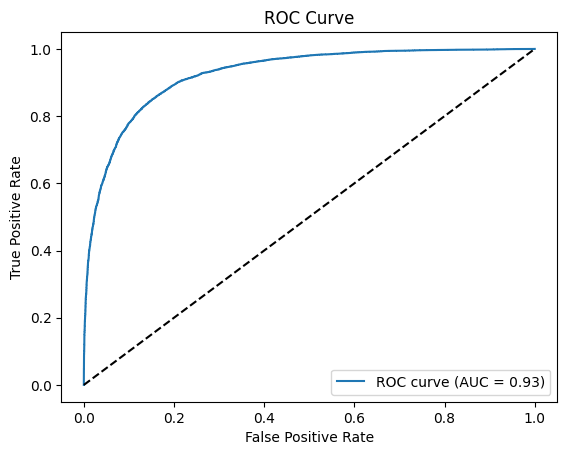

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

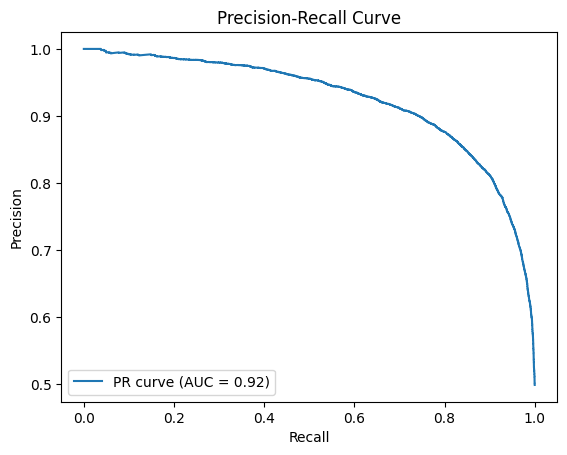

In [12]:
plt.figure()
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

0.93 рок аук это неплохо. Давайте теперь сравним с логрегом из коробки:

In [13]:
model_sklearn = LogisticRegression(max_iter=1000, solver='lbfgs')
model_sklearn.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred_proba_sklearn = model_sklearn.predict_proba(X_test)[:, 1]
roc_auc_sklearn = roc_auc_score(y_test, y_pred_proba_sklearn)
precision_sklearn, recall_sklearn, _ = precision_recall_curve(y_test, y_pred_proba_sklearn)
pr_auc_sklearn = auc(recall_sklearn, precision_sklearn)
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_pred_proba_sklearn)

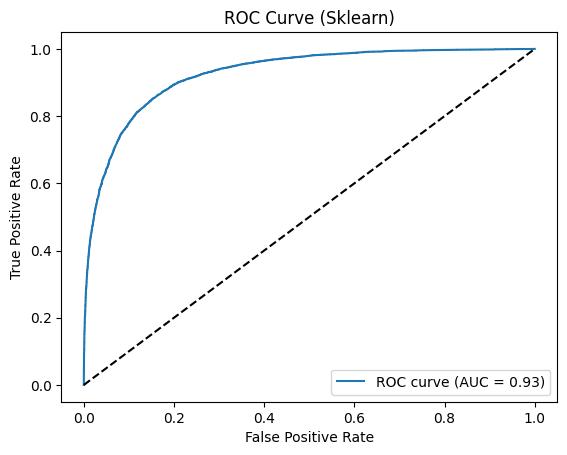

In [15]:
plt.figure()
plt.plot(fpr_sklearn, tpr_sklearn, label=f'ROC curve (AUC = {roc_auc_sklearn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Sklearn)')
plt.legend(loc="lower right")
plt.show()

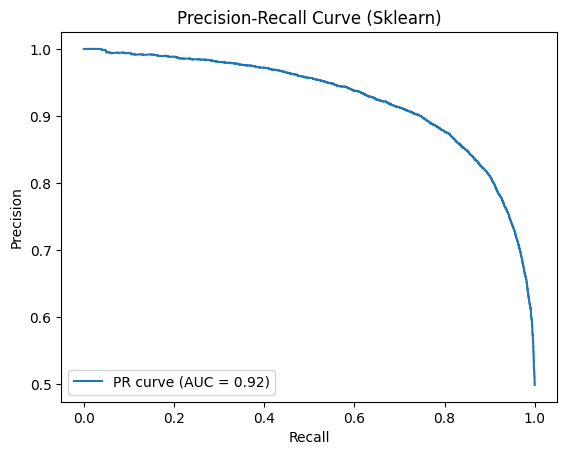

In [16]:
plt.figure()
plt.plot(recall_sklearn, precision_sklearn, label=f'PR curve (AUC = {pr_auc_sklearn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Sklearn)')
plt.legend(loc="lower left")
plt.show()

Отлично)

Но мы забыли попробовать стохастический спуск:

In [119]:
model_stoch = LogReg(gd_type='stochastic', tolerance=1e-4, max_iter=1000, eta=1e-2)

In [120]:
model_stoch.fit(X_train, y_train)

LogReg()

In [121]:
y_pred_proba = model_stoch.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

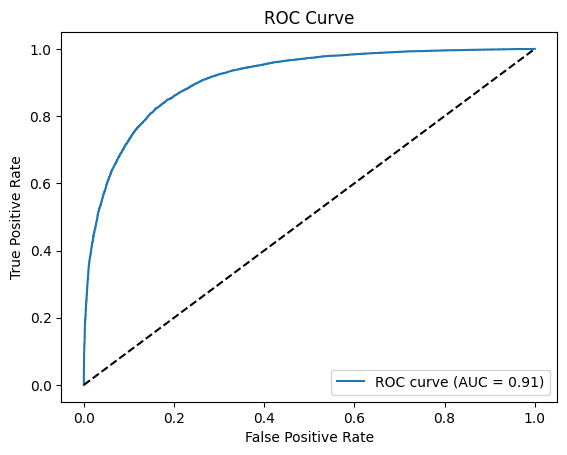

In [122]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

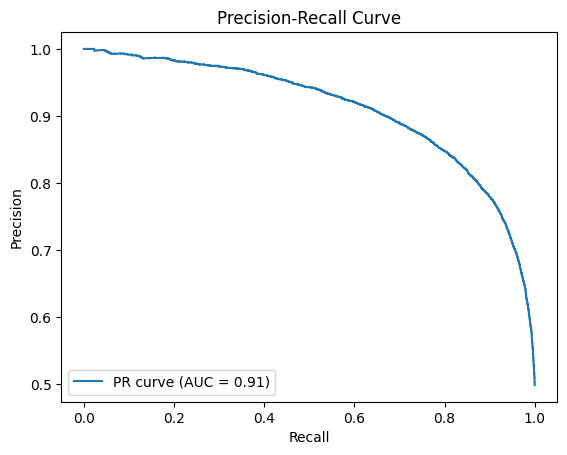

In [123]:
plt.figure()
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Чуточку хуже. Но пойдет =)

# **Часть 2. Отбор признаков (5 баллов)**

Перейдём к еще одной важной части процесса работы с данными — отбору признаков. Он нужен в следующих случаях:
- Мы хотим сократить время вычислений;
- Мы хотим избежать переобучения;
- Мы хотим попытаться улучшить качество модели за счет уменьшения признакового пространства;

В этой части мы попробуем применить несколько подходов для отбора признаков и оценим, как они влияют на качество модели и сколько времени занимают.

**Данные** \

Будем использовать датасет [об обращениях клиентов по страховым случаям](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data?select=train.csv). Скачайте его с Kaggle (файл `train.csv`).

Задача представляет собой бинарную классификациюю — воспользуется ли клиент страховкой на авто в ближайший год.

In [124]:
# from google.colab import files
# files.upload()

In [18]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

porto-seguro-safe-driver-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
!unzip porto-seguro-safe-driver-prediction.zip -d data

Archive:  porto-seguro-safe-driver-prediction.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/sample_submission.csv  
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/test.csv           
replace data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/train.csv          


In [17]:
PATH_TO_DATASET = "/content/data/train.csv"

data = pd.read_csv(PATH_TO_DATASET, index_col=0)
target = data.target.values

data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [18]:
data.shape

(595212, 57)

In [19]:
y_train.shape

(476169,)

In [20]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 57 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ps_ind_01       595212 non-null  int64  
 1   ps_ind_02_cat   595212 non-null  int64  
 2   ps_ind_03       595212 non-null  int64  
 3   ps_ind_04_cat   595212 non-null  int64  
 4   ps_ind_05_cat   595212 non-null  int64  
 5   ps_ind_06_bin   595212 non-null  int64  
 6   ps_ind_07_bin   595212 non-null  int64  
 7   ps_ind_08_bin   595212 non-null  int64  
 8   ps_ind_09_bin   595212 non-null  int64  
 9   ps_ind_10_bin   595212 non-null  int64  
 10  ps_ind_11_bin   595212 non-null  int64  
 11  ps_ind_12_bin   595212 non-null  int64  
 12  ps_ind_13_bin   595212 non-null  int64  
 13  ps_ind_14       595212 non-null  int64  
 14  ps_ind_15       595212 non-null  int64  
 15  ps_ind_16_bin   595212 non-null  int64  
 16  ps_ind_17_bin   595212 non-null  int64  
 17  ps_ind_18_bin 

In [22]:
data.head(2)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0


### **Задание 3. (0.25 балла)**

Прежде всего — в данных много категориальных признаков.

- Закодируйте их с помощью one-hot кодирования. Категориальные признаки отмечены постфиксом `cat`;
- Исходные колонки с категориальными признаками удалите;
- Зафиксируйте, сколько признаков получилось;

In [23]:
cat_features = [col for col in X_train.columns if 'cat' in col]
X_train_ohe = pd.get_dummies(X_train, columns=cat_features)
X_test_ohe = pd.get_dummies(X_test, columns=cat_features)

In [24]:
X_train.shape, X_train_ohe.shape

((476169, 57), (476169, 227))

In [25]:
X_train_ohe.head(2)

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
id,,,,,,,,,,,,,,,,,,,,,
381341,1,8,0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1327969,2,2,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [26]:
X_train_ohe.shape[1] - X_train.shape[1]

170

### **Задание 4 (1 балл)**

Обучим несколько моделей, перечисленных ниже. В качестве метрики будем использовать ROC-AUC.

**Задание 4.1**

- Обучите модель логистической регрессии. Замерьте скорость обучения модели
- Обучите метод опорных векторов
- Обучите метод k ближайших соседей
- Посчитайте качество моделей (ROC-AUC) на тестовой выборке

**Задание 4.2**

Для каждой из трех моделей (логистическая регрессия, SVM, KNN) подберите при помощи GridSearchCV на тренировочных данных оптимальные гиперпараметры:
- Для логистической регрессии: C, class_weight
- Для SVM: C, kernel, class_weight
- Для KNN: n_neighbors, weights

Затем посчитайте качество моделей на тестовой выборке.

В заданиях 4.1 и 4.2 замеряйте время обучения моделей.


In [27]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_ohe, y_train)
lr_time = time.time() - start
lr_pred = lr.predict_proba(X_test_ohe)[:, 1]
lr_roc = roc_auc_score(y_test, lr_pred)
lr_time, lr_roc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(45.84288501739502, 0.6364452193683499)

SVC крутится ооочень долго. Давайте уменьшим трейн и тест в 20 раз. Получим подвыборку в 30000 семплов примерно, как и говорила Сабрина в чатике.

In [29]:
X_train_ohe.shape, X_test_ohe.shape

((476169, 227), (119043, 227))

In [30]:
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=124)

In [31]:
X_test_small, _, y_test_small, _ = train_test_split(X_test, y_test, test_size=0.95, random_state=124)

In [32]:
start = time.time()
svc = SVC(probability=True)
svc.fit(X_train_small, y_train_small)
svc_time = time.time() - start
svc_pred = svc.predict_proba(X_test_small)[:, 1]
svc_roc = roc_auc_score(y_test_small, svc_pred)
svc_time, svc_roc

(81.64003491401672, 0.4839983527962289)

Рок-аук так себе, конечно)

То же самое с KNN - на полном датасете предиктит ооочень долго. Возьмем подвыборку из 200к (одна треть) семплов.

In [34]:
X_train_small_knn, _, y_train_small_knn, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=124)
X_test_small_knn, _, y_test_small_knn, _ = train_test_split(X_test, y_test, test_size=0.7, random_state=124)

In [35]:
start = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_small_knn, y_train_small_knn)
knn_time = time.time() - start
knn_pred = knn.predict_proba(X_test_small_knn)[:, 1]
knn_roc = roc_auc_score(y_test_small_knn, knn_pred)
knn_time, knn_roc

(0.14382362365722656, 0.5098808718102973)

In [37]:
param_lr = {'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced']}
#param_svc = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf'], 'class_weight': [None, 'balanced']}
param_svc = {'C': [0.1, 1], 'class_weight': [None, 'balanced']}
param_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

In [38]:
start = time.time()
gs_lr = GridSearchCV(LogisticRegression(), param_lr, scoring='roc_auc', cv=3)
gs_lr.fit(X_train_ohe, y_train)
gs_lr_time = time.time() - start
gs_lr_pred = gs_lr.predict_proba(X_test_ohe)[:, 1]
gs_lr_roc = roc_auc_score(y_test, gs_lr_pred)
gs_lr_time, gs_lr_roc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(541.4392855167389, 0.6356840885930458)

In [39]:
start = time.time()
gs_svc = GridSearchCV(SVC(probability=True), param_svc, scoring='roc_auc', cv=2)
gs_svc.fit(X_train_small, y_train_small)
gs_svc_time = time.time() - start
gs_svc_pred = gs_svc.predict_proba(X_test_small)[:, 1]
gs_svc_roc = roc_auc_score(y_test_small, gs_svc_pred)
gs_svc_time, gs_svc_roc

(1056.4239802360535, 0.6212368759374332)

Логрег из коробки все равно лучше!

In [40]:
start = time.time()
gs_knn = GridSearchCV(KNeighborsClassifier(), param_knn, scoring='roc_auc', cv=3)
gs_knn.fit(X_train_small_knn, y_train_small_knn)
gs_knn_time = time.time() - start
gs_knn_pred = gs_knn.predict_proba(X_test_small_knn)[:, 1]
gs_knn_roc = roc_auc_score(y_test_small_knn, gs_knn_pred)
gs_knn_time, gs_knn_roc

(898.7253837585449, 0.5144072283572745)

### **Встроенные методы**

**Заметим, что:**

- Время обучения моделей отличается между собой.
- Несмотря на то, что признаков много, качество модели не очень хорошее.


Попробуем решить проблемы — улучшить качество и при этом сократить пространство признаков и, соответственно, время обучения моделей.



**Отбор признаков встроеным методом.**

Начнём с отбора признаков с помощью линейной модели. Делая это, мы используем факт:
> веса линейной модели отражают  вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков.

Такой метод отбора называются встроенным в модель методом, так как он заложен в особенности модели.

**Важно:** применение этого подхода требует машстабирования признаков (подумайте, почему). Вы можете использовать приведение к стандартному нормальному распределению (`StandardScaler`) с параметрами или MinMax преобразование (`MinMaxScaler`).

### **Задание 5 (0.75 балла)**

Оставьте 150 признаков с наибольшими по модулю весами после обучения логистической регрессии.

- Замерьте скорость такого отбора признаков. (0.2 балла)

- Обучите логистическую регрессию на исходных признаках. Из них оставьте 150 лучших (с наибольшими по модулю весами).
- Масштабируйте данные — все, кроме категориальных и бинарных признаков. Зафиксируйте, сколько признаков пришлось масштабировать. (0.25 балла)
- Обучите новую модель на 150 признаках и оцените её качество. (0.15 балла)




In [41]:
lr

LogisticRegression()

In [45]:
from sklearn.preprocessing import StandardScaler

start = time.time()
weights = np.abs(lr.coef_).flatten()
top_150_indices = np.argsort(weights)[-150:]
X_train_150 = X_train_ohe.iloc[:, top_150_indices]
X_test_150 = X_test_ohe.iloc[:, top_150_indices]
select_time = time.time() - start
select_time

0.23392605781555176

Довольно быстро.

In [46]:
num_cols = [col for col in X_train_150.columns if 'cat' not in col and 'bin' not in col]
scaler = StandardScaler()
X_train_150[num_cols] = scaler.fit_transform(X_train_150[num_cols])
X_test_150[num_cols] = scaler.transform(X_test_150[num_cols])

<ipython-input-46-e96d8eeb4914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_150[num_cols] = scaler.fit_transform(X_train_150[num_cols])
<ipython-input-46-e96d8eeb4914>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_150[num_cols] = scaler.transform(X_test_150[num_cols])


In [48]:
num_cols

['ps_ind_15',
 'ps_car_12',
 'ps_ind_14',
 'ps_calc_01',
 'ps_calc_03',
 'ps_reg_02',
 'ps_car_15',
 'ps_reg_01',
 'ps_reg_03',
 'ps_car_13']

In [47]:
start = time.time()
model_150 = LogisticRegression()
model_150.fit(X_train_150, y_train)
preds = model_150.predict_proba(X_test_150)[:, 1]
roc_auc = roc_auc_score(y_test, preds)
train_time = time.time() - start
train_time, roc_auc, len(num_cols)

(13.847259759902954, 0.6375024383527201, 10)

### **Бонус (0.25 балла)**

Попробуйте реализовать итеративный отбор признаков, а именно:

1) Сначала отобрать около 200 признаков (действуя как в задании выше)

2) Потом повторить процедуру для отбора 150 признаков из 200 (снова действуя как в задании выше)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Не успел.

### **Задание 6 (0.5 балла)**

Также можно задать отбор признаков, используя другия свойства модели. Вспомним, что L1-регуляризация тоже умеет отбирать признаки.

- Обучите модель на исходных данных. Подберите по сетке (GridSearch) наилучшее значение коэффициента регуляризации C. (0.1 балла)

- Посмотрите сколько признаков отобрала модель с найденным оптимальным C?
  - Сначала посчитайте только число ненулевых весов
  - Затем посчитайте число весов, которые после округления до двух знаков после запятой не равны нулю (0.25 балла)

Удалось ли отобрать 150 признаков за 1 шаг? (0.05 балла)

In [49]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
model = LogisticRegression(penalty='l1', solver='liblinear')
grid = GridSearchCV(model, param_grid, scoring='roc_auc', cv=3)
grid.fit(X_train_ohe, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [50]:
best_model = grid.best_estimator_
best_c = grid.best_params_['C']
best_model, best_c

(LogisticRegression(C=0.1, penalty='l1', solver='liblinear'), 0.1)

In [51]:
non_zero_weights = np.sum(best_model.coef_ != 0)
rounded_weights = np.sum(np.round(best_model.coef_, 2) != 0)
non_zero_weights, rounded_weights

(132, 120)

### **Методы фильтрации**

Также можно отбирать признаки, применяя методы математической статистики. А именно, в нашем случае, через подсчёт некоторой функции для каждого признака. На основании значений этой функции (она называется *статистикой*) мы можем оставлять наиболее важные признаки. Методы этого семейства называют *фильтрационными* или *filter methods*.

**Что проверяем:**

Равны ли математические ожидания (то есть выборочные средние) распределений признака для двух разных классов? Если они различаются, значит и сами распределения разные. И можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и значение статистики маленькое, то и признак бесполезен.


Для проверки будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ s^2_+ + n_- s^2_-}{n_+ + n_-}}},$$

где $\mu$, $s$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

**Примечание:** Если у вас была данная тема на курсе по математической статистике, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях.

Хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и $n$ велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются.

Для отбора признаков по t-статистике мы возьмём признаки с наибольшим значением статистики.

### **Задание 7 (1 балла)**

-  Масштабируйте признаки исходного датасета — все, кроме категориальных и бинарных.
- Выделите непрерывные признаки (те, которые масштабировали)
- Посчитайте значения t-статистики. Оставьте ***половину*** признаков с наибольшим значением статистики, объедините их с категориальными и бинарными.
- Обучите модель логистической регрессии и замерьте качество.

Не забудьте замерить скорость отбора признаков в этом случаев.

Мы уже масштабировали выборку выше, и если я правильно понял, тут просят то же самое (если имеют ввиду датасет с OHE). Ну ок, сделаем заново:

In [61]:
num_cols = [col for col in X_train_ohe.columns if 'cat' not in col and 'bin' not in col]
scaler = StandardScaler()
X_train_scaled = X_train_ohe.copy()
X_test_scaled = X_test_ohe.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_scaled[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_scaled[num_cols])

In [62]:
len(num_cols), len(X_train_ohe.columns)

(26, 227)

In [64]:
cat_bin_cols = [col for col in X_train_ohe.columns if 'cat' in col or 'bin' in col]

start = time.time()
means_0 = X_train_scaled[y_train == 0].mean(axis=0)
means_1 = X_train_scaled[y_train == 1].mean(axis=0)
stds_0 = X_train_scaled[y_train == 0].std(axis=0)
stds_1 = X_train_scaled[y_train == 1].std(axis=0)
n_0 = (y_train == 0).sum()
n_1 = (y_train == 1).sum()

t_stat = np.abs(means_1 - means_0) / np.sqrt((n_0 * stds_0**2 + n_1 * stds_1**2) / (n_0 + n_1))
t_indices = np.argsort(t_stat)[-len(t_stat)//2:]
selected_cols = list(X_train_scaled.columns[t_indices])
selected_cols = list(set(selected_cols + cat_bin_cols))
select_time = time.time() - start

len(selected_cols), select_time

(212, 1.9223382472991943)

In [65]:
X_train_filtered = X_train_scaled[selected_cols]
X_test_filtered = X_test_scaled[selected_cols]
model = LogisticRegression()
model.fit(X_train_filtered, y_train)
preds = model.predict_proba(X_test_filtered)[:, 1]
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.6392551211842289

Почти 0.64. Неплохо!

### **Методы-обёртки**

### **Задание 8 (бонус, 1 балл)**


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди каждый из признаков и смотрим, как это влияет на качество модели, обученной без удаленного признака. Удаляем признаки таким жадным способом.

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур много. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 150 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [66]:
X_sample, _, y_sample, _ = train_test_split(X_train_ohe, y_train, train_size=10000)

num_cols = [col for col in X_sample.columns if 'cat' not in col and 'bin' not in col]
scaler = StandardScaler()
X_sample[num_cols] = scaler.fit_transform(X_sample[num_cols])
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_sample, y_sample, test_size=0.5)

In [69]:
start = time.time()
remaining_features = list(X_train_sub.columns)
selected_features = []
group_size = 5

while len(remaining_features) > 150:
    groups = [remaining_features[i:i + group_size] for i in range(0, len(remaining_features), group_size)]
    scores = []
    for group in groups:
        cols = [col for col in remaining_features if col not in group]
        model = LogisticRegression()
        model.fit(X_train_sub[cols], y_train_sub)
        preds = model.predict_proba(X_val[cols])[:, 1]
        score = roc_auc_score(y_val, preds)
        scores.append((group, score))
    scores.sort(key=lambda x: x[1], reverse=True)
    best_groups = scores[:-1]
    remaining_features = [col for group, _ in best_groups for col in group]

select_time = time.time() - start
select_time

89.54734086990356

In [70]:
final_model = LogisticRegression()
final_model.fit(X_train_ohe[remaining_features], y_train)
preds = final_model.predict_proba(X_test_ohe[remaining_features])[:, 1]
roc_auc = roc_auc_score(y_test, preds)
roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6070603623871148

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


### **Задание 9 (0.25 балла)**

Подведите итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

Короткий вывод по методам отбора признаков:

	1. Встроенные методы (по весам логистической регрессии):
	*	Быстрые и простые.
	*	Подходят для больших данных, но могут пропустить важные признаки.
	*	Хорошее качество при минимальных затратах времени.

	2.	Методы фильтрации (t-статистика):
	*	Учитывают статистические различия между классами.
	*	Быстрые, но игнорируют взаимодействие признаков.
	*	Качество ниже, чем у встроенных методов.

	3.	Метод-обёртка (жадный отбор):
	*	Лучшее качество, так как оценивает влияние каждого признака на модель.
	*	Очень медленный и трудоёмкий, подходит для небольших выборок.

	4.	Метод регуляризации (L1):
	*	Быстро отбирает признаки прямо во время обучения модели.
	*	Требует нормализации данных и подбора гиперпараметров.
	*	Оптимальный баланс скорости и качества.

Лучший рок-аук получился при применении фильтрации t-статистикой!

# **Часть 3. Обучение моделей на текстовых данных. (3.5 балла)**

 ### **Подготовка данных из реального мира.**

Загрузите данные с конкурса  [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv) (вам нужна только обучающая выборка, файл `train.csv`). Задача состоит в определении постов, сообщающих о чрезвычайной ситуации. В рамках домашнего задания, этот набор данных будет отличным полем для тренировки в обработке признаков.

In [72]:
!kaggle competitions download -c nlp-getting-started

100% 593k/593k [00:00<00:00, 3.47MB/s]
100% 593k/593k [00:00<00:00, 3.46MB/s]


In [74]:
!unzip nlp-getting-started.zip -d data2

Archive:  nlp-getting-started.zip
  inflating: data2/sample_submission.csv  
  inflating: data2/test.csv          
  inflating: data2/train.csv         


In [75]:
from sklearn.model_selection import train_test_split

PATH = '/content/data2/train.csv'
data = pd.read_csv(PATH)

data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### **Задание 10. Базовая предобработка (0.5 баллов).**

- Выведите на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [76]:
data.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [77]:
data = data.fillna('')

- Проанализируйте количество уникальных значений в числовых столбцах. Сделайте выводы.

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [78]:
numeric_cols = data.select_dtypes(include=['number'])
for col in numeric_cols.columns:
    print(col, data[col].nunique())

id 7613
target 2


У нас бинарная классификация. И 7600 айдишников.

- Проанализируйте соотношение классов в целевой переменной. Почему значимо это учитывать?

In [80]:
data['target'].value_counts()

,count
target,
0,4342
1,3271


Нулевого класса примерно на 30% больше. Почему это важно? Если классы сильно несбалансированы, то модель может переобучиться на более частый класс.

- Объедините все три текстовых столбца в один (вам поможет конкатенация строк)

In [82]:
text_cols = data.select_dtypes(include=['object']).columns
text_cols

Index(['keyword', 'location', 'text'], dtype='object')

In [83]:
data['text_all'] = data[text_cols[0]] + ' ' + data[text_cols[1]] + ' ' + data[text_cols[2]]

- Наконец, поделите данные на тренировочную и тестовую выборки.

In [84]:
from sklearn.model_selection import train_test_split

X = data['text_all']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### **Задание 11. Базовые модели. (1 балл).**

Данные, собираемые с сайтов, часто содержат мусор не информативный для моделей. Посмотрите, какого качества данные здесь. Для этого:
- Примените CountVectorizer из sklearn к сырым даным. Какого размера получилась матрица?

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X_train)
X_vectorized.shape

(5329, 18301)

- Обучите логистическую регрессию на полученном наборе. Какое качество `f1` у модели получилось на тестовых данных?

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_vectorized, y_train)

LogisticRegression()

In [98]:
X_test_vectorized = vectorizer.transform(X_test)
preds = model.predict(X_test_vectorized)
f1_log = f1_score(y_test, preds)
f1_log

0.747000521648409

- Обучите SVC на тех же данных с гиперпараметрами по умолчанию. Измерьте качество (`f1`) на тестовых данных и опишите результат. Проанализируйте качество и скорость обучения.

In [99]:
from sklearn.svm import SVC
import time

start = time.time()
svc = SVC()
svc.fit(X_vectorized, y_train)
train_time = time.time() - start

X_test_vectorized = vectorizer.transform(X_test)
preds = svc.predict(X_test_vectorized)

f1_svc = f1_score(y_test, preds)
train_time, f1_svc

(10.795130968093872, 0.7237354085603113)

SVC обучается быстро, ф1 чуть ниже чем у логрега, но выглядит неплохо.

### **Задание 12. Улучшение базовых моделей за счет данных. (0.5 балла).**

- Подберите гиперпараметры CountVectorizer так, чтобы признаков было минимум в 4 раза меньше, чем объектов, а качество модели при этом изменилось не более чем на $\pm 0.07$. Опишите подобранные гиперпараметры и на что они влияют (0.5 балла).

Обучайте и логистическую регрессию, и SVC.

In [101]:
vectorizer = CountVectorizer(max_df=0.9, min_df=10, max_features=len(X_train) // 4, ngram_range=(1, 2))
X_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [102]:
X_vectorized.shape

(5329, 1332)

In [103]:
log_model = LogisticRegression()
log_model.fit(X_vectorized, y_train)
log_preds = log_model.predict(X_test_vectorized)
log_f1 = f1_score(y_test, log_preds)
log_f1

0.736567553468962

In [104]:
log_f1 - f1_log

-0.010432968179447055

In [105]:
svc_model = SVC()
svc_model.fit(X_vectorized, y_train)
svc_time = time.time() - start
svc_preds = svc_model.predict(X_test_vectorized)
svc_f1 = f1_score(y_test, svc_preds)
svc_f1

0.7283813747228381

In [106]:
svc_f1 - f1_svc

0.004645966162526882

* max_df=0.9 - исключает слова, которые встречаются в 90% и более документов.
* min_df=10 - исключает слова, которые встречаются менее чем в 10 документах.
* ngram_range=(1, 2) - учитывает не только отдельные слова (униграммы), но и пары слов (биграммы).

### **Задание 13. Улучшение базовых моделей путем подбора гиперпараметров. (1 балл).**
- Попробуйте подбирать разные гиперпараметры для логистической регрессии. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [107]:
param_grid = {
              'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, scoring='f1', cv=3)
grid.fit(X_vectorized, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [109]:
best_model_log = grid.best_estimator_
best_params_log = grid.best_params_

X_test_vectorized = vectorizer.transform(X_test)
preds = best_model_log.predict(X_test_vectorized)
f1_best_log = f1_score(y_test, preds)
best_params_log, f1_best_log

({'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.7402394586153045)

- Попробуйте подбирать разные гиперпараметры для модели SVC. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [110]:
param_grid = {
              'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

grid = GridSearchCV(SVC(), param_grid, scoring='f1', cv=3)
grid.fit(X_vectorized, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

In [112]:
best_model_svc = grid.best_estimator_
best_params_svc = grid.best_params_

X_test_vectorized = vectorizer.transform(X_test)
preds = best_model_svc.predict(X_test_vectorized)
f1_best_svc = f1_score(y_test, preds)
best_params_svc, f1_best_svc

({'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, 0.7377490576198169)

In [113]:
f1_best_log - f1_log

-0.006761063033104531

In [114]:
f1_best_svc - f1_svc

0.01401364905950564

Особого улучшения качества линейным моделей мы не добились. Надо лучше работать над фичами - залог успеха любого датасаентиста =)

### **Задание 14. (0.5 балла)**

Оформите два пайплайна:
- для модели регрессии
- для SVC модели

в пайплайн должны входить предобработка сырого датасета и обучение модели.

In [115]:
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([
    ('vectorizer', CountVectorizer(max_df=0.9, min_df=10, max_features=5000, ngram_range=(1, 2))),
    ('model', LogisticRegression(max_iter=5000))
])

pipeline_svc = Pipeline([
    ('vectorizer', CountVectorizer(max_df=0.9, min_df=10, max_features=5000, ngram_range=(1, 2))),
    ('model', SVC())
])

In [116]:
pipeline_lr.fit(X_train, y_train)
preds_lr = pipeline_lr.predict(X_test)
f1_score(y_test, preds_lr)

0.7326007326007326

In [117]:
pipeline_svc.fit(X_train, y_train)
preds_svc = pipeline_svc.predict(X_test)
f1_score(y_test, preds_svc)

0.7277747101049145

### **Выводы**

Зафиксируйте выводы работы. Проанализируйте, что проделано и какие результаты вы получили. Заполняется в свободной форме.

Если тут имеются выводы по текстовому датасету, то вот они:  
1. Логистическая регрессия показала себя как более быстрая и удобная модель для работы с большими текстовыми данными. SVC требует больше ресурсов и времени, но может быть полезна в задачах с небольшой выборкой или сложными зависимостями.
2. Дальнейшее улучшение качества возможно за счёт использования других методов векторизации текста (TF-IDF или Word2Vec) и тестирования дополнительных моделей.

## Чей кот?

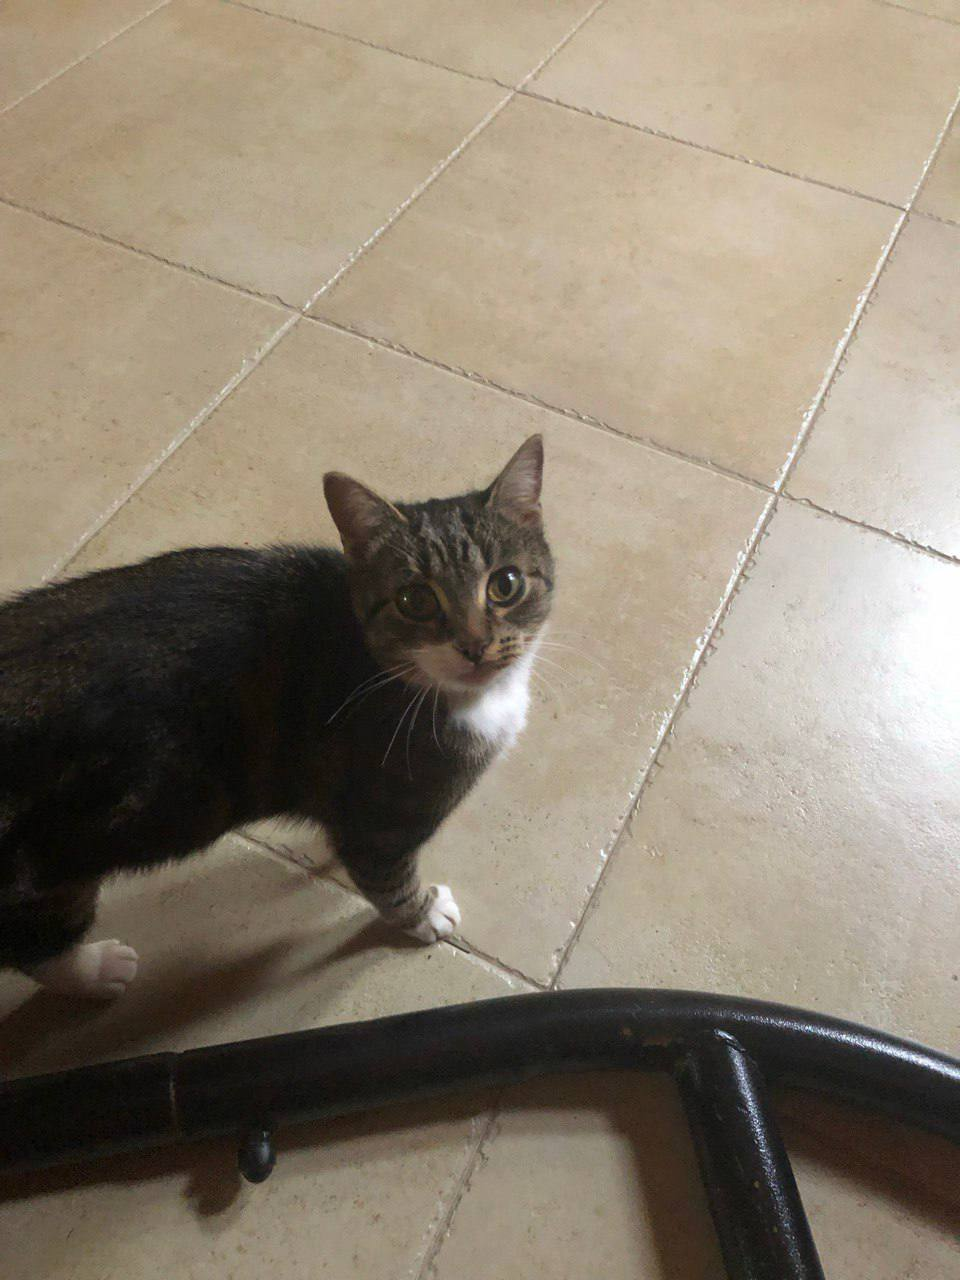

Кот - Елены =)